In [58]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import dimod
import networkx as nx
from dwave.system import DWaveSampler, EmbeddingComposite
from qiskit.visualization import plot_histogram

In [59]:
n = 10   # length of each random bit array

shots = 10
bqm_qubo = dimod.BinaryQuadraticModel.from_numpy_matrix(np.zeros((n,n)))

sampleset = EmbeddingComposite(DWaveSampler(solver={'qpu': True})).sample(bqm_qubo, \
                               num_reads=shots)


In [60]:
result = pd.DataFrame.from_records(sampleset.aggregate().record.tolist(),
                                    columns=['Samples','Energy','Occurrences','chain'])


# result = result.sort_values(by=['Energy'],ignore_index=True)
result['Numbers'] =  [(int("".join(str(x) for x in sample), 2)) for sample in result['Samples']]
result['selected'] = [(int(sum(sample))) for sample in result['Samples']]

result

,Samples,Energy,Occurrences,chain,Numbers,selected
0,"[0, 0, 0, 1, 1, 1, 0, 1, 1, 0]",0.0,1,0.0,118,5
1,"[1, 0, 1, 0, 0, 1, 1, 0, 0, 0]",0.0,1,0.0,664,4
2,"[0, 0, 0, 1, 1, 0, 1, 1, 0, 0]",0.0,1,0.0,108,4
3,"[1, 1, 0, 0, 0, 0, 0, 1, 0, 0]",0.0,1,0.0,772,3
4,"[0, 0, 1, 1, 1, 0, 1, 0, 0, 1]",0.0,1,0.0,233,5
5,"[0, 0, 0, 0, 1, 1, 1, 0, 0, 0]",0.0,1,0.0,56,3
6,"[1, 0, 0, 0, 0, 1, 0, 1, 1, 0]",0.0,1,0.0,534,4
7,"[0, 1, 0, 1, 0, 1, 1, 1, 0, 0]",0.0,1,0.0,348,5
8,"[1, 0, 0, 0, 1, 1, 0, 0, 1, 0]",0.0,1,0.0,562,4
9,"[1, 1, 0, 0, 0, 0, 1, 0, 1, 0]",0.0,1,0.0,778,4


In [61]:
result["probability"] = result["Occurrences"]/result["Occurrences"].sum()

sample_string = []
for string in result["Samples"]:
    string = str(string.tolist())[1:-1]
    string = string.replace(", ","")
    sample_string.append(" ".join(string.split()))

result["Samples"] = sample_string

In [62]:
result

,Samples,Energy,Occurrences,chain,Numbers,selected,probability
0,0001110110,0.0,1,0.0,118,5,0.1
1,1010011000,0.0,1,0.0,664,4,0.1
2,0001101100,0.0,1,0.0,108,4,0.1
3,1100000100,0.0,1,0.0,772,3,0.1
4,0011101001,0.0,1,0.0,233,5,0.1
5,0000111000,0.0,1,0.0,56,3,0.1
6,1000010110,0.0,1,0.0,534,4,0.1
7,0101011100,0.0,1,0.0,348,5,0.1
8,1000110010,0.0,1,0.0,562,4,0.1
9,1100001010,0.0,1,0.0,778,4,0.1


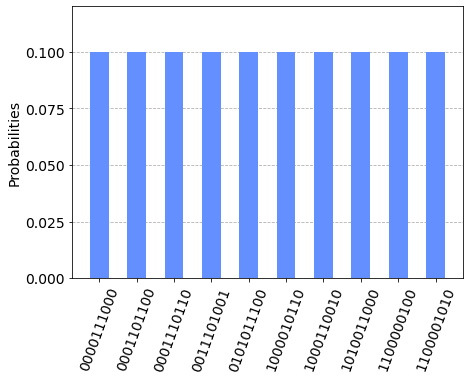

In [63]:
my_data = result[["Samples","probability"]]

my_dict = {}

for i in range(my_data.shape[0]):
    my_dict[my_data["Samples"][i]] = my_data["probability"][i]

plot_histogram(my_dict,bar_labels=False)